# ISMET OKAN CELIK CWID:10472265

#  Question-1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.plotting import parallel_coordinates
import numpy as np
from pandas.plotting import table
import statsmodels.api as sm

In [2]:
data=pd.read_csv('EE627A_HW1_Data.csv')
data_prep=data.drop(['Date'],axis=1,inplace=False)
df=pd.DataFrame(data_prep)
CorrMatrix=df.corr()
CorrMatrix.head()

,Mkt-RF,SMB,HML,RF,Mom,Food,Beer,Smoke,Games,Books,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Mkt-RF,1.000000,0.326863,0.216145,-0.068723,-0.338343,0.835924,0.707673,0.584268,0.830211,0.830092,...,0.755235,0.495606,0.842644,0.869099,0.858688,0.796012,0.858747,0.753859,0.915884,0.842008
SMB,0.326863,1.000000,0.094113,-0.059640,-0.164023,0.201698,0.351039,0.103154,0.412089,0.408145,...,0.160554,0.285080,0.329809,0.275653,0.348099,0.459826,0.302931,0.368637,0.282586,0.423908
HML,0.216145,0.094113,1.000000,0.012115,-0.400635,0.215132,0.214982,0.171809,0.250387,0.250608,...,0.099079,-0.084935,-0.066278,0.197336,0.430456,0.209154,0.114997,0.163557,0.324566,0.165099
RF,-0.068723,-0.059640,0.012115,1.000000,0.039130,0.032222,-0.011277,0.063036,-0.024963,0.009172,...,0.034355,-0.011451,-0.051596,-0.024349,-0.017855,-0.012879,-0.009125,-0.022962,-0.011648,-0.035674
Mom,-0.338343,-0.164023,-0.400635,0.039130,1.000000,-0.280289,-0.200077,-0.219165,-0.356992,-0.306399,...,-0.293874,-0.092466,-0.228394,-0.300174,-0.423153,-0.260379,-0.309388,-0.250813,-0.420421,-0.290321


In [3]:
#Dropping Factors Columns From Data Frame and Only Keeping Industries
#Because we only need correlation between factors and industries
factor_df=pd.DataFrame(CorrMatrix)
factor_df=factor_df.iloc[0:5,5:]
factor_df.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Mkt-RF,0.835924,0.707673,0.584268,0.830211,0.830092,0.816234,0.780630,0.804022,0.883889,0.823438,...,0.755235,0.495606,0.842644,0.869099,0.858688,0.796012,0.858747,0.753859,0.915884,0.842008
SMB,0.201698,0.351039,0.103154,0.412089,0.408145,0.261883,0.460134,0.208896,0.208012,0.495356,...,0.160554,0.285080,0.329809,0.275653,0.348099,0.459826,0.302931,0.368637,0.282586,0.423908
HML,0.215132,0.214982,0.171809,0.250387,0.250608,0.107373,0.246719,0.064393,0.192392,0.347476,...,0.099079,-0.084935,-0.066278,0.197336,0.430456,0.209154,0.114997,0.163557,0.324566,0.165099
RF,0.032222,-0.011277,0.063036,-0.024963,0.009172,-0.024209,-0.020186,0.007783,-0.033856,-0.035738,...,0.034355,-0.011451,-0.051596,-0.024349,-0.017855,-0.012879,-0.009125,-0.022962,-0.011648,-0.035674
Mom,-0.280289,-0.200077,-0.219165,-0.356992,-0.306399,-0.199683,-0.360482,-0.225778,-0.301203,-0.371137,...,-0.293874,-0.092466,-0.228394,-0.300174,-0.423153,-0.260379,-0.309388,-0.250813,-0.420421,-0.290321


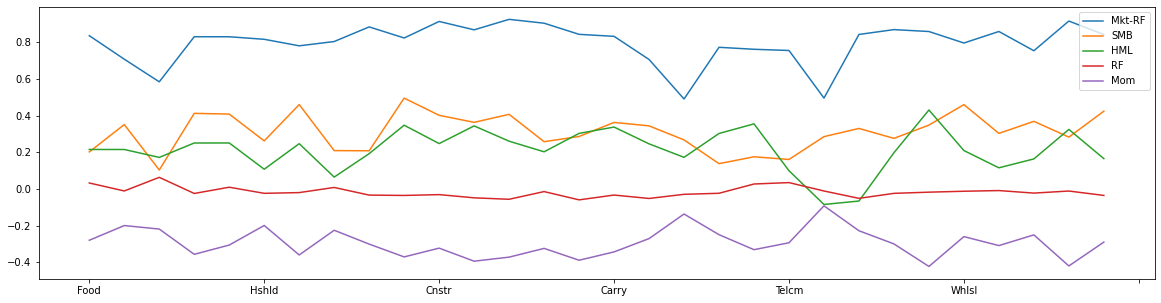

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

factor_df.T.plot(table=False, ax=ax);

We can also see which factor most correlated with every industry on the graph. Mkt-RF (Market Risk Free) is the most correlated factor, and Mom (Momentum) is the negatively correlated factor. RF (Riskfreerate) does not correlate highly with any industry.

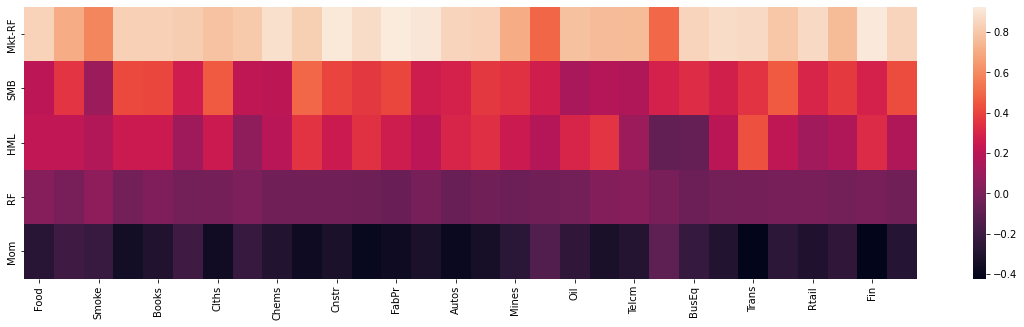

In [5]:
fig=plt.figure()
sn.heatmap(factor_df)
fig.set_figwidth(20)
fig.set_figheight(5)
plt.show()

Mkt_RF (Market Risk-Free) is the most highly correlated factor with every industry, as we can see on the heatmap above. The graph shows its correlation coefficient is closest to the r=1 that is why the heat color of Mkt_RF is primarily light-colored.

Mom (Momentum) is the negatively correlated factor on the heatmap. The graph shows that correlation coefficients r are around -0.4. For this reason, the heat map shows dark colors.

RF (Risk Free Rate) does not correlate with any industry, and as we can see on the graph r correlation coefficents r are around 0.

In [6]:
#Calculation of Auto-Correlation Function (ACF) from Time-Lag(1) to Time-Lag(10)
ACF_Mkt_RF=sm.tsa.acf(factor_df.iloc[0],nlags=10)
ACF_SMB=sm.tsa.acf(factor_df.iloc[1],nlags=10)
ACF_HML=sm.tsa.acf(factor_df.iloc[2],nlags=10)
ACF_RF=sm.tsa.acf(factor_df.iloc[3],nlags=10)
ACF_Mom=sm.tsa.acf(factor_df.iloc[4],nlags=10)
data_ACF=[ACF_Mkt_RF,ACF_SMB,ACF_HML,ACF_RF,ACF_Mom]
ACF_df=pd.DataFrame(data_ACF,index=['ACF_Mkt_RF','ACF_SMB','ACF_HML','ACF_RF','ACF_Mom'])
ACF_df.T

C:\Users\okanc\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


,ACF_Mkt_RF,ACF_SMB,ACF_HML,ACF_RF,ACF_Mom
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.265962,0.046341,0.309947,0.224183,0.140254
2,0.066292,0.077607,-0.259990,0.336513,-0.076050
3,0.016351,0.138315,-0.243149,-0.041576,-0.076769
4,0.224533,-0.265698,0.037447,0.004009,0.252086
5,-0.086949,0.084392,0.214473,0.040677,0.089861
6,-0.204150,0.074719,-0.082180,0.024825,-0.145821
7,-0.357957,-0.253680,-0.252920,-0.039545,-0.483255
8,-0.271716,-0.172884,-0.076457,-0.181050,-0.128542
9,-0.299380,-0.278789,0.063098,-0.277822,-0.106833


Text(0, 0.5, 'ACF Values')

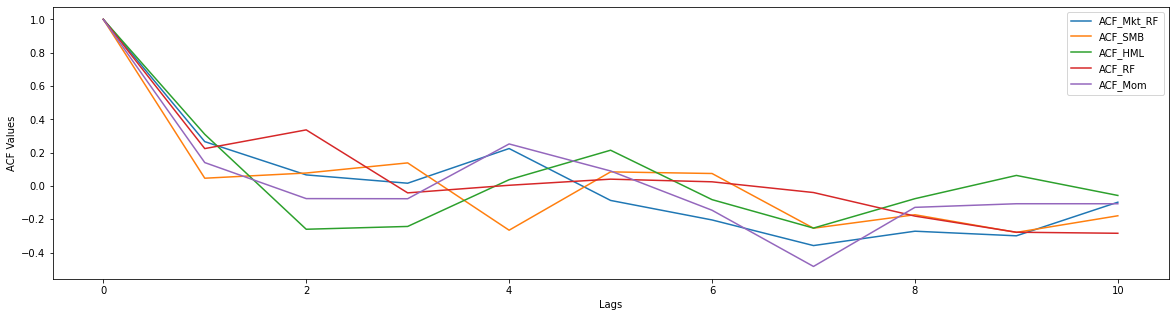

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))

ACF_df.T.plot(table=False, ax=ax);
plt.xlabel('Lags')
plt.ylabel('ACF Values')

As we can see on the graph that all factors are generally decreasing. They follow the similar trend in terms of ACF as we can see on the movement of the lines.